In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("preprocessed_DNN.csv",low_memory=False)

In [3]:
X = df.drop("Attack_type", axis =1)
y = df['Attack_type']

# Model training 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = XGBClassifier(random_state =33)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Model Evaluation

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1945
           1       0.90      0.96      0.93      2072
           2       1.00      0.99      0.99      2619
           3       1.00      1.00      1.00      2099
           4       1.00      1.00      1.00      2874
           5       0.83      0.66      0.73       183
           6       1.00      1.00      1.00        68
           7       1.00      1.00      1.00      4860
           8       0.86      0.82      0.84      2014
           9       0.93      1.00      0.97      1738
          10       0.95      0.95      0.95      1964
          11       0.87      0.82      0.85      2042
          12       0.81      0.90      0.86      1994
          13       0.99      0.96      0.98      2007
          14       0.94      0.90      0.92      1961

    accuracy                           0.95     30440
   macro avg       0.94      0.93      0.93     30440
weighted avg       0.95   

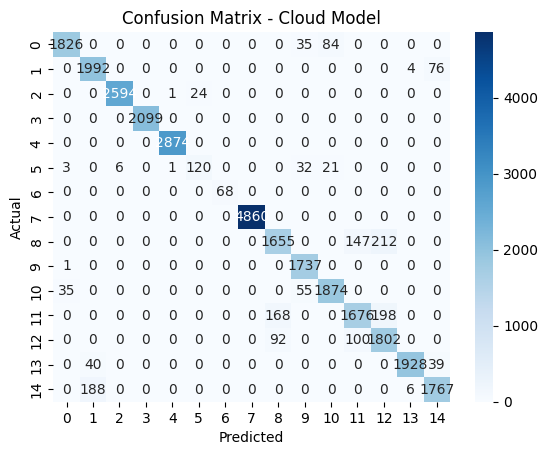

In [10]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Cloud Model")
plt.show()

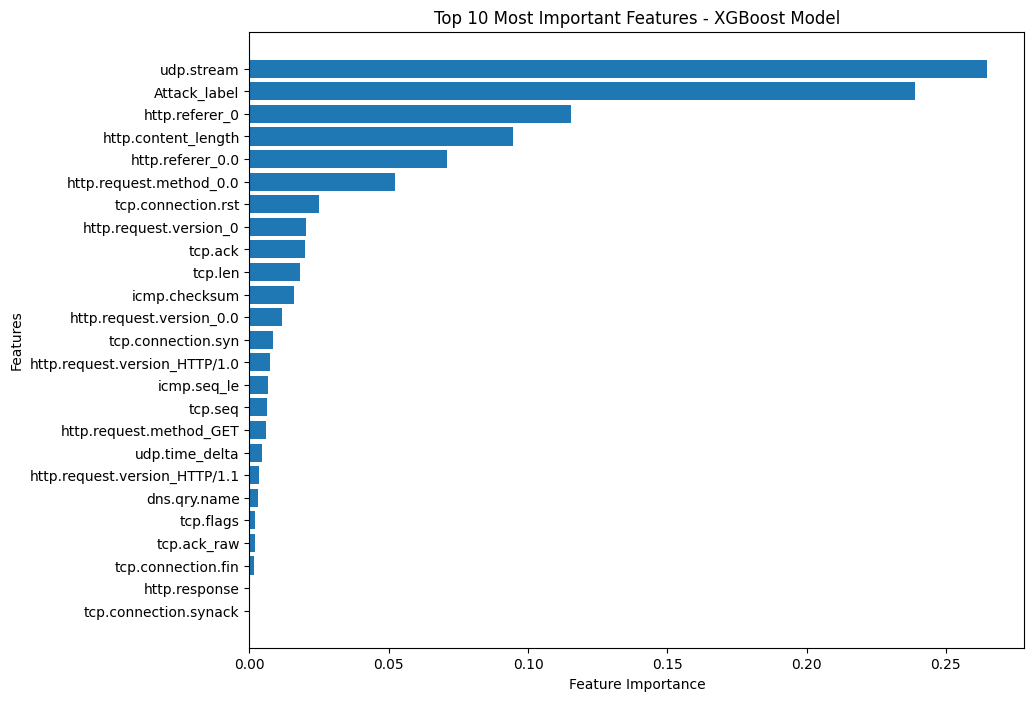

In [11]:
feature_importance = model.feature_importances_
indices = feature_importance.argsort()[-25::]
plt.figure(figsize=(10, 8))
plt.barh([X_train.columns[i] for i in indices], feature_importance[indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Most Important Features - XGBoost Model')
plt.show()